In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from userfuntions import *
import numpy as np

In [65]:
# Let’s import five different CSV files, each for a specific occupation

df_analyst = pd.read_csv('data/vacancies_data analyst_deutschland.csv', thousands=".")
df_dataengineer = pd.read_csv('data/vacancies_data engineer_deutschland.csv', thousands=".")
df_datascientist = pd.read_csv('data/vacancies_data-scientist_deutschland.csv', thousands=".")
df_machineslearning = pd.read_csv('data/vacancies_Machine Learning Engineer_deutschland.csv', thousands=".")
df_sql = pd.read_csv('data/vacancies_SQL_deutschland.csv', thousands=".")

In [66]:
# Join all vacancies into a single dataset, check the data types, and print the info

df = pd.concat([df_analyst, df_dataengineer, df_datascientist, df_machineslearning, df_sql], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10665 entries, 0 to 10664
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10665 non-null  int64  
 1   title        10665 non-null  object 
 2   company      10665 non-null  object 
 3   city         10665 non-null  object 
 4   salary_min   8880 non-null   float64
 5   salary_max   8880 non-null   float64
 6   days_posted  10131 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 583.4+ KB


In [67]:
# Let's convert the salary columns to numeric types, and divide the days_posted by 10 to make it relative to the original data. 
# The mistake in the days_posted column is that values like 4.0 were entered as 40.0, so we divide by 10 to correct this.

#df["salary_min"] = df["salary_min"].astype("Int64")
#df["salary_max"] = df["salary_max"].astype("Int64")
df["days_posted"] = (df["days_posted"] / 10).astype("Int64")
df

,id,title,company,city,salary_min,salary_max,days_posted
0,12463614,Data Analyst Sales (m/w/d),BusinessBike GmbH,Herzogenaurach,49000.0,68000.0,<NA>
1,12433847,Operations Analyst / Business Analyst – Planni...,DOT GmbH,Rostock,39000.0,62000.0,<NA>
2,12442527,Aktuar / Mathematiker / Data Analyst (m/w/d) f...,RheinLand Versicherungs AG,Neuss,65000.0,95000.0,4
3,12447989,Data Analyst - Integration von Datenbanken (m/...,EOS Holding,Hamburg,53000.0,73000.0,4
4,12449934,Referent / Data Analyst technisches Reinsuranc...,Allianz Versicherungs-AG,Unterföhring bei München,53000.0,91000.0,4
...,...,...,...,...,...,...,...
10660,12434726,Softwareentwickler (m/w/d),LIS AG,Europa,37000.0,53000.0,7
10661,11740539,Datenbank Engineer (m/w/d),ITnova GmbH,Reichenbach,36000.0,57000.0,7
10662,12082212,IT-Systemadministrator (m/w/d) (IT-Systemadmin...,Wiemann Lehrmittel GmbH,Muldestausee,NaN,NaN,4
10663,12373782,(Senior) Software Implementation Specialist (m...,Zucchetti Germany GmbH,Langenhagen Han,38000.0,58000.0,6


In [68]:
# Let's check duplicates in the dataset. id is the unique identifier for each vacancy, so we can check for duplicates based on that column.

display(df.duplicated().sum())
df[df["id"].duplicated(keep=False)].sort_values(by="id", ascending=True)

np.int64(2661)

,id,title,company,city,salary_min,salary_max,days_posted
2456,5583747,Junior Consultant Business Intelligence (m/w/d),ORAYLIS GmbH,Meerbusch bei Düsseldorf,45000.0,50000.0,3
8769,5583747,Junior Consultant Business Intelligence (m/w/d),ORAYLIS GmbH,Meerbusch bei Düsseldorf,45000.0,50000.0,3
9232,6125778,Software Test Automation Engineer (m/w/d),Ehrhardt + Partner Group,Aachen,44000.0,60000.0,7
1998,6125778,Software Test Automation Engineer (m/w/d),Ehrhardt + Partner Group,Aachen,44000.0,60000.0,7
3584,6995988,Site Reliability Engineer (f/m/d),alfaview gmbh,bundesweit,46000.0,63000.0,1
...,...,...,...,...,...,...,...
7925,12466353,Statistiken der EKD,Hoffnungstaler Stiftung Lobetal – JMD Barnim-O...,"15 Reichenwalde, Deutschland",40000.0,58000.0,<NA>
196,12466353,Statistiken der EKD,Hoffnungstaler Stiftung Lobetal – JMD Barnim-O...,"15 Reichenwalde, Deutschland",40000.0,58000.0,<NA>
8401,12466353,Statistiken der EKD,Hoffnungstaler Stiftung Lobetal – JMD Barnim-O...,"15 Reichenwalde, Deutschland",40000.0,58000.0,<NA>
6658,12466773,"Sr Electrical Engineer, EU AMZL Sustainability...",Amazon Workforce Staffing,Munich,NaN,NaN,<NA>


In [69]:
# Let's drop the duplicates and check again

df.drop_duplicates(subset=["id"], keep='first', inplace=True)
display(df.duplicated().sum())
df[df["id"].duplicated(keep=False)].sort_values(by="id", ascending=True)

np.int64(0)

,id,title,company,city,salary_min,salary_max,days_posted


In [70]:
df.reset_index(drop=True, inplace=True)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7980 entries, 0 to 7979
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           7980 non-null   int64  
 1   title        7980 non-null   object 
 2   company      7980 non-null   object 
 3   city         7980 non-null   object 
 4   salary_min   6548 non-null   float64
 5   salary_max   6548 non-null   float64
 6   days_posted  7560 non-null   Int64  
dtypes: Int64(1), float64(2), int64(1), object(3)
memory usage: 444.3+ KB


,id,title,company,city,salary_min,salary_max,days_posted
0,12463614,Data Analyst Sales (m/w/d),BusinessBike GmbH,Herzogenaurach,49000.0,68000.0,<NA>
1,12433847,Operations Analyst / Business Analyst – Planni...,DOT GmbH,Rostock,39000.0,62000.0,<NA>
2,12442527,Aktuar / Mathematiker / Data Analyst (m/w/d) f...,RheinLand Versicherungs AG,Neuss,65000.0,95000.0,4
3,12447989,Data Analyst - Integration von Datenbanken (m/...,EOS Holding,Hamburg,53000.0,73000.0,4
4,12449934,Referent / Data Analyst technisches Reinsuranc...,Allianz Versicherungs-AG,Unterföhring bei München,53000.0,91000.0,4
...,...,...,...,...,...,...,...
7975,12434726,Softwareentwickler (m/w/d),LIS AG,Europa,37000.0,53000.0,7
7976,11740539,Datenbank Engineer (m/w/d),ITnova GmbH,Reichenbach,36000.0,57000.0,7
7977,12082212,IT-Systemadministrator (m/w/d) (IT-Systemadmin...,Wiemann Lehrmittel GmbH,Muldestausee,NaN,NaN,4
7978,12373782,(Senior) Software Implementation Specialist (m...,Zucchetti Germany GmbH,Langenhagen Han,38000.0,58000.0,6


In [71]:
# let's create a new column title_short that contains the short name of the job title, that are interesting for us
# and a new column seniority that contains the seniority level of the job title

df["title_short"] = df["title"].apply(lambda title: extract_keywords_job(title))
df["seniority"] = df["title"].apply(lambda title: extract_seniority(title))

df.info()
df[~df["title_short"].isnull()].sample(10)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7980 entries, 0 to 7979
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           7980 non-null   int64  
 1   title        7980 non-null   object 
 2   company      7980 non-null   object 
 3   city         7980 non-null   object 
 4   salary_min   6548 non-null   float64
 5   salary_max   6548 non-null   float64
 6   days_posted  7560 non-null   Int64  
 7   title_short  746 non-null    object 
 8   seniority    7980 non-null   object 
dtypes: Int64(1), float64(2), int64(1), object(5)
memory usage: 569.0+ KB


,id,title,company,city,salary_min,salary_max,days_posted,title_short,seniority
731,12415604,Senior Data Engineer w/m/d am Standort Berlin,Quirin Privatbank AG,Berlin,62000.0,83000.0,7,Data engineer,Senior
639,11997472,Business Analyst / Requirements Engineer (m/w/d),FERCHAU – Connecting People and Technologies,Gummersbach,45000.0,60000.0,5,Business analyst,None(Mid)
102,12268264,Senior Data Scientist / Senior AI Engineer (mwd),HMS Analytical Software GmbH,Berlin,55000.0,83000.0,7,Data engineer,Senior
1223,12417008,Data Engineer (m/w/d),Duravit AG,Hornberg,44545.0,80264.0,7,Data engineer,None(Mid)
632,12365427,Werkstudent*in Machine Learning Engineer (m/w/d),Mercedes-Benz Tech Innovation,Karlsruhe,NaN,NaN,7,Machine learning engineer,Intern
648,12337053,Business Analyst*in im Datenmanagement (in Tei...,Union Investment,Frankfurt am Main,63000.0,84000.0,7,Data analyst,None(Mid)
1675,12272027,Senior Business Analyst (m/w/d) Insurance,Continentale Lebensversicherung AG,München,48000.0,67000.0,7,Business analyst,Senior
1053,11645918,IT Business Analyst ERP (m/w/d),abcfinance GmbH,Köln,60000.0,80000.0,5,Business analyst,None(Mid)
914,11617151,Senior Business Analyst,Hopmann | Marketing Analytics Inh. Jörg Hopmann,Munich,54000.0,73000.0,7,Business analyst,Senior
162,11602249,Senior Data Scientist (m/w/d),S-Payment GmbH - Ein Unternehmen der DSV-Gruppe,Berlin,80000.0,90000.0,6,Data scientist,Senior


In [72]:
df = df.dropna(subset=["title_short"])
df


,id,title,company,city,salary_min,salary_max,days_posted,title_short,seniority
0,12463614,Data Analyst Sales (m/w/d),BusinessBike GmbH,Herzogenaurach,49000.0,68000.0,<NA>,Data analyst,None(Mid)
1,12433847,Operations Analyst / Business Analyst – Planni...,DOT GmbH,Rostock,39000.0,62000.0,<NA>,Business analyst,None(Mid)
2,12442527,Aktuar / Mathematiker / Data Analyst (m/w/d) f...,RheinLand Versicherungs AG,Neuss,65000.0,95000.0,4,Data analyst,None(Mid)
3,12447989,Data Analyst - Integration von Datenbanken (m/...,EOS Holding,Hamburg,53000.0,73000.0,4,Data analyst,None(Mid)
4,12449934,Referent / Data Analyst technisches Reinsuranc...,Allianz Versicherungs-AG,Unterföhring bei München,53000.0,91000.0,4,Data analyst,Senior
...,...,...,...,...,...,...,...,...,...
7715,12420779,Dezernatsleitung (m/w/d) „Datenbankverfahren“,Landesamt für Vermessung und Geoinformation S-H,Kiel,52000.0,71000.0,7,Data engineer,None(Mid)
7726,11795544,Datenbankadministrator (w/m/d),DYNASYS Datentechnik GmbH,Augsburg,37000.0,53000.0,7,Data engineer,None(Mid)
7820,11848125,Werkstudent/Praktikant als Rust/C++ Backend So...,nebumind GmbH,Taufkirchen,NaN,NaN,4,Data analyst,Intern
7908,12125513,Consultant (w/m/d) Business Intelligence,"MCG, Management Consulting GmbH",Mannheim,45000.0,62000.0,7,Business intelligence,None(Mid)


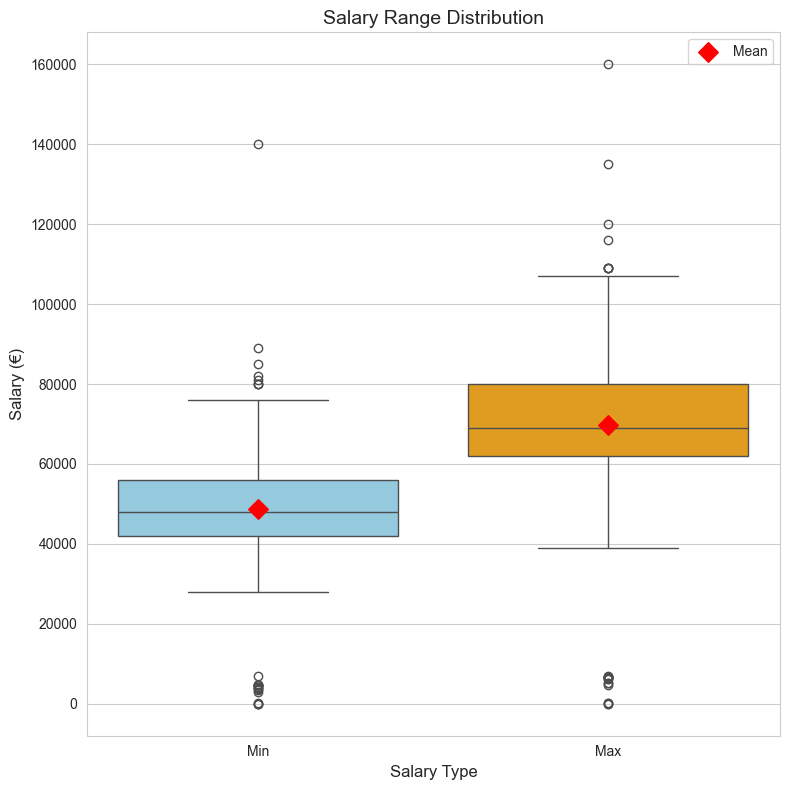

In [89]:
plt.figure(figsize=(8, 8))
sns.set_style("whitegrid")

# Convert data to long format for salary columns
plot_data = pd.melt(
    df[["salary_min", "salary_max"]], 
    var_name="salary_type", 
    value_name="amount"
)
plot_data.dropna(inplace=True)  # Remove missing values

# Create boxplot with explicit hue
sns.boxplot(
    data=plot_data,
    x="salary_type",
    y="amount",
    hue="salary_type",  # Add hue for coloring
    palette=["skyblue", "orange"],
    legend=False  # Disable legend for hue
)

# Add mean markers
means = df[["salary_min", "salary_max"]].mean()
plt.scatter(
    x=[0, 1], 
    y=means, 
    color="red", 
    marker="D", 
    s=100,  # Marker size
    label="Mean",
    zorder=10
)

# Customize plot
plt.title("Salary Range Distribution", fontsize=14)
plt.xlabel("Salary Type", fontsize=12)
plt.ylabel("Salary (€)", fontsize=12)
plt.xticks(
    ticks=[0, 1], 
    labels=["Min", "Max"]
)
plt.legend()
plt.tight_layout()
plt.show()

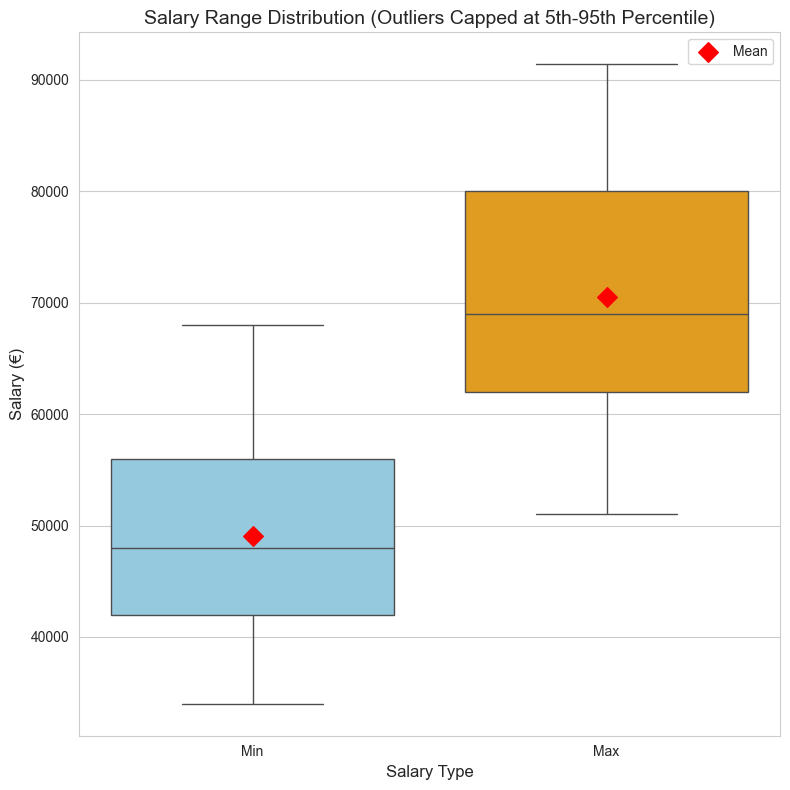

In [74]:
plt.figure(figsize=(8, 8))
sns.set_style("whitegrid")

# Calculate percentiles - fixed variable names
cap_value_up = df[["salary_min", "salary_max"]].quantile(0.95)
cap_value_down = df[["salary_min", "salary_max"]].quantile(0.05)

df_capped = df.copy()
# Use correct variable names (cap_value_up instead of cap_value)
df_capped["salary_min"] = df["salary_min"].clip(
    lower=cap_value_down["salary_min"],
    upper=cap_value_up["salary_min"]
)
df_capped["salary_max"] = df["salary_max"].clip(
    lower=cap_value_down["salary_max"],
    upper=cap_value_up["salary_max"]
)

plot_data = pd.melt(
    df_capped[["salary_min", "salary_max"]], 
    var_name="salary_type", 
    value_name="amount"
).dropna()

sns.boxplot(
    data=plot_data,
    x="salary_type",
    y="amount",
    hue="salary_type",
    palette=["skyblue", "orange"],
    legend=False
)

means = df_capped[["salary_min", "salary_max"]].mean()
plt.scatter(
    x=[0, 1], 
    y=means, 
    color="red", 
    marker="D", 
    s=100,
    label="Mean",
    zorder=10
)

plt.title("Salary Range Distribution (Outliers Capped at 5th-95th Percentile)", fontsize=14)
plt.xlabel("Salary Type", fontsize=12)
plt.ylabel("Salary (€)", fontsize=12)
plt.xticks(ticks=[0, 1], labels=["Min", "Max"])
plt.legend()
plt.tight_layout()
plt.show()

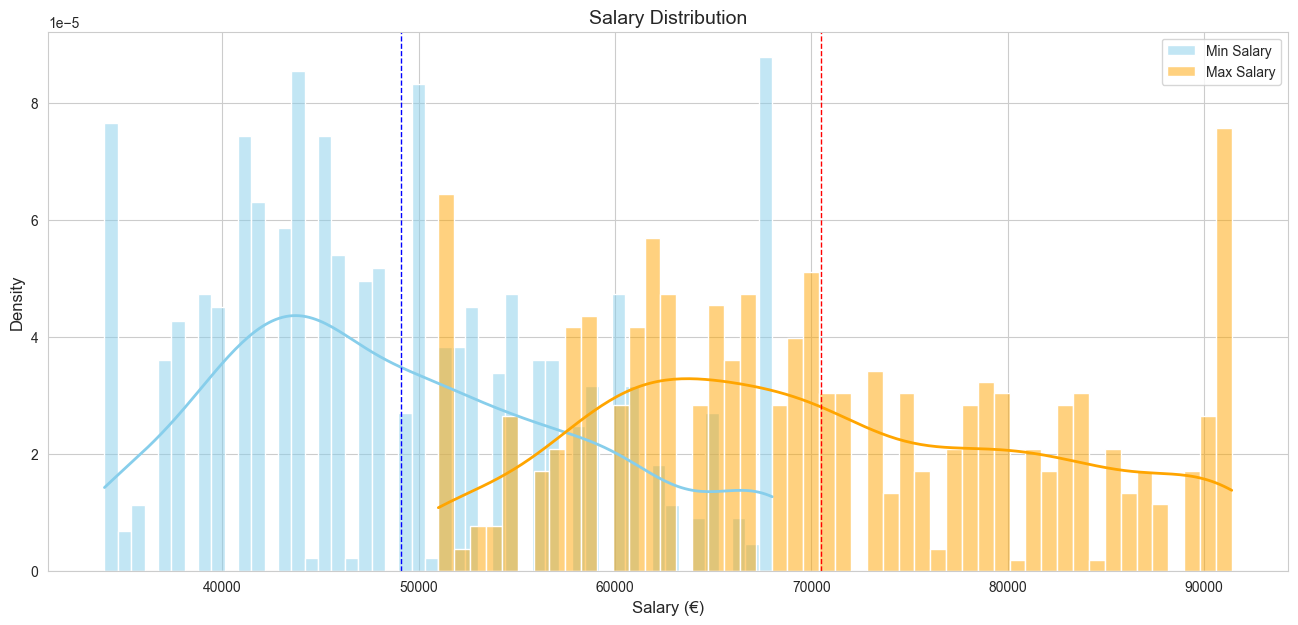

In [75]:
plt.figure(figsize=(16, 7))
sns.set_style("whitegrid")

# Histogram and KDE for salary_min
sns.histplot(
    df_capped['salary_min'], 
    bins=50, 
    kde=True,  
    color='skyblue', 
    alpha=0.5, 
    label='Min Salary',
    stat='density',
    line_kws={'color': 'blue', 'linewidth': 2}  # Using line_kws instead of kde_kws
)

# Histogram and KDE for salary_max
sns.histplot(
    df_capped['salary_max'], 
    bins=50, 
    kde=True, 
    color='orange', 
    alpha=0.5, 
    label='Max Salary',
    stat='density',
    line_kws={'color': 'red', 'linewidth': 2}  # Same here
)

# Mean value lines
plt.axvline(df_capped['salary_min'].mean(), color='blue', linestyle='--', linewidth=1)
plt.axvline(df_capped['salary_max'].mean(), color='red', linestyle='--', linewidth=1)

# Plot settings
plt.title('Salary Distribution', fontsize=14)
plt.xlabel('Salary (€)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.show()

In [76]:
# Let's check the distribution of the salary_min and salary_max columns according to the seniority level
#df_seniority = df_capped.dropna(subset=["seniority"])
df_seniority = df.dropna(subset=["seniority"])
df_seniority[df_seniority["seniority"] == "Intern"].sample(10)

,id,title,company,city,salary_min,salary_max,days_posted,title_short,seniority
44,12317650,Working Student Data Analyst (m/f/d),Experteer GmbH,München,NaN,NaN,14,Data analyst,Intern
17,12445899,Working Student | Data Analyst - Corporate Aud...,TRATON SE,München,NaN,NaN,4,Data analyst,Intern
2643,12425642,Praktikum Sales Analytics & Business Intellige...,ProSiebenSat.1 Careers,München,NaN,NaN,7,Business intelligence,Intern
275,12246513,Werkstudent*in Business/ Data Analyst (m/w/d) ...,Knuddels Beteiligungs GmbH,Karlsruhe,NaN,NaN,14,Business analyst,Intern
768,12302819,Werkstudent Business Analyst (m/w/d) auf Start...,ZOÉ LU GmbH Lodenfrey-Park Haus H,"München, Deutschland",NaN,NaN,3,Business analyst,Intern
1263,12181424,Pflicht-Praktikum im Bereich Data Visualizatio...,Mercedes-Benz AG,Stuttgart,NaN,NaN,7,Data engineer,Intern
237,12374235,Werkstudent:in als Marketing Data Analyst (m/w/d),excentos Software GmbH,"Potsdam, DE",NaN,NaN,6,Data analyst,Intern
3158,12332970,Ausbildung zum/zur Fachinformatiker/-in (m/w/d...,Dataciders GmbH,Dortmund,NaN,NaN,14,Data analyst,Intern
2861,12440941,Data Engineer - Werkstudent,Datamesh GmbH,Würzburg,NaN,NaN,7,Data engineer,Intern
303,12448861,Werkstudent (m/w/d) AWS & Webentwicklung – Dat...,Wrage Advisory GmbH,"Bonn, Deutschland",NaN,NaN,3,Data analyst,Intern


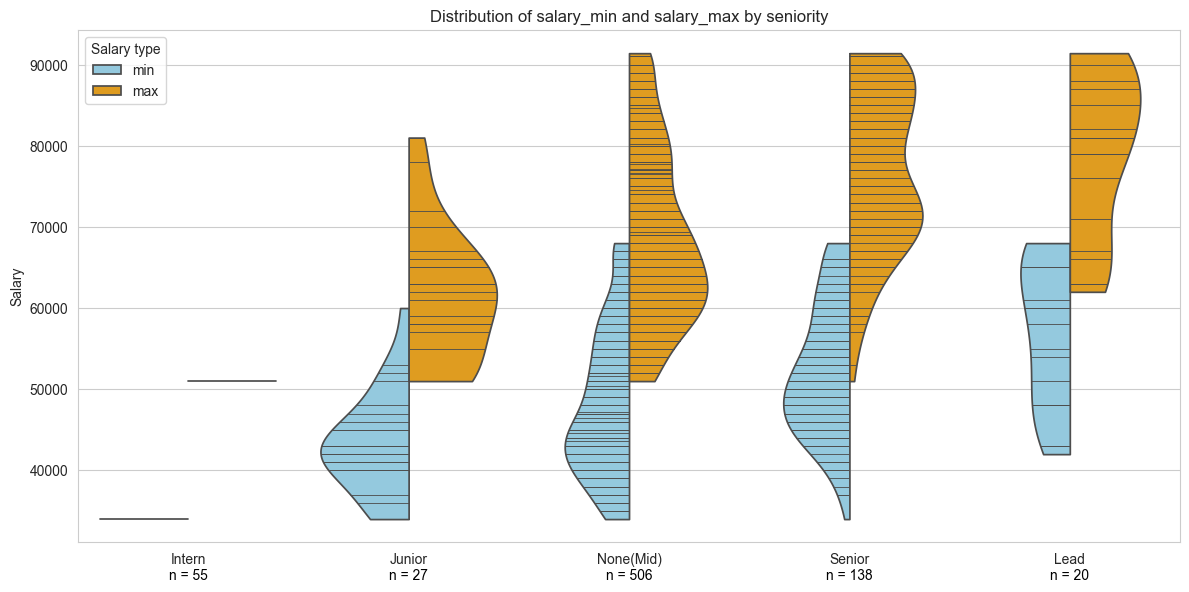

In [77]:
# ver 1 - capped data
df_min = df_capped[['seniority', 'salary_min']].copy()
df_min = df_min.rename(columns={'salary_min': 'salary'})
df_min['type'] = 'min'
df_min = df_min.reset_index(drop=True)

df_max = df_capped[['seniority', 'salary_max']].copy()
df_max = df_max.rename(columns={'salary_max': 'salary'})
df_max['type'] = 'max'
df_max = df_max.reset_index(drop=True)

df_long = pd.concat([df_min, df_max], ignore_index=True)

order = ['Intern', 'Junior', 'None(Mid)', 'Senior', 'Lead']

# Plotting the violin plot
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='seniority', y='salary', hue='type', data=df_long, split=True, order=order, inner='stick', cut=0, palette={'min': 'skyblue', 'max': 'orange'})

# Get counts of rows per seniority level
group_counts = df_capped['seniority'].value_counts().to_dict()

# Add count annotations below the x-axis
for tick, label in enumerate(ax.get_xticklabels()):
    seniority_level = label.get_text()
    count = group_counts.get(seniority_level, 0)
    ax.text(tick, ax.get_ylim()[0] - 0.05 * (ax.get_ylim()[1] - ax.get_ylim()[0]),
            f'n = {count}', ha='center', va='top', fontsize=10, color='black')

plt.title('Distribution of salary_min and salary_max by seniority')
plt.ylabel('Salary')
plt.xlabel('')
plt.legend(title='Salary type')
plt.tight_layout()
plt.show()

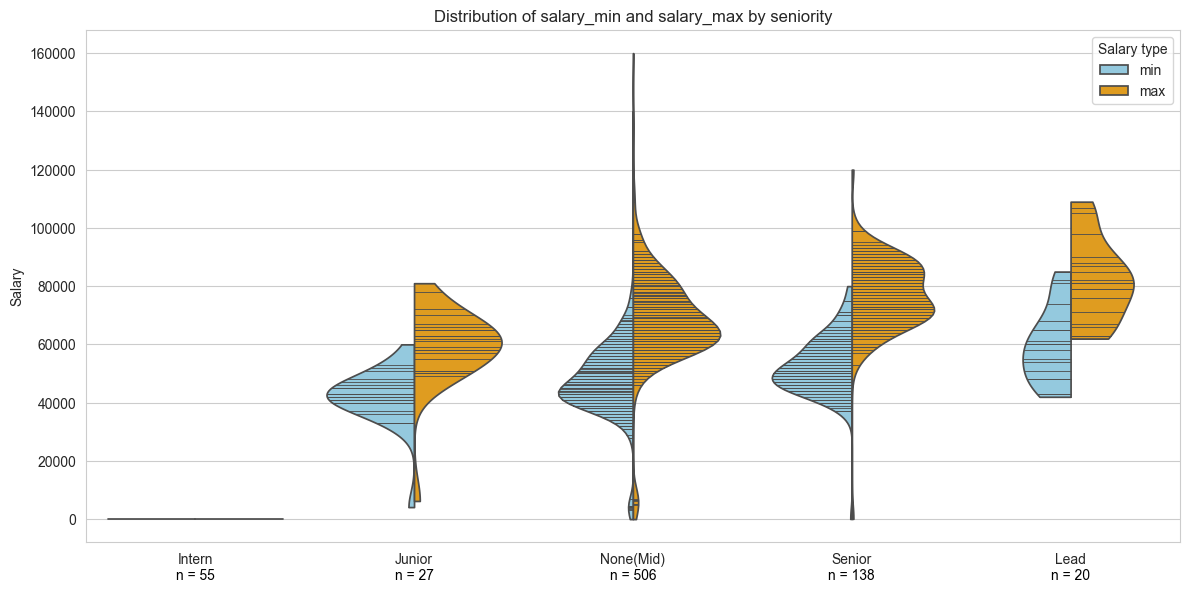

In [86]:
# ver 2 - original data
df_min = df_seniority[['seniority', 'salary_min']].copy()
df_min = df_min.rename(columns={'salary_min': 'salary'})
df_min['type'] = 'min'
df_min = df_min.reset_index(drop=True)

df_max = df_seniority[['seniority', 'salary_max']].copy()
df_max = df_max.rename(columns={'salary_max': 'salary'})
df_max['type'] = 'max'
df_max = df_max.reset_index(drop=True)

df_long = pd.concat([df_min, df_max], ignore_index=True)

order = ['Intern', 'Junior', 'None(Mid)', 'Senior', 'Lead']

# Plotting the violin plot
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='seniority', y='salary', hue='type', data=df_long, split=True, order=order, inner='stick', cut=0, palette={'min': 'skyblue', 'max': 'orange'})

# Get counts of rows per seniority level
group_counts = df_seniority['seniority'].value_counts().to_dict()

# Add count annotations below the x-axis
for tick, label in enumerate(ax.get_xticklabels()):
    seniority_level = label.get_text()
    count = group_counts.get(seniority_level, 0)
    ax.text(tick, ax.get_ylim()[0] - 0.05 * (ax.get_ylim()[1] - ax.get_ylim()[0]),
            f'n = {count}', ha='center', va='top', fontsize=10, color='black')

plt.title('Distribution of salary_min and salary_max by seniority')
plt.ylabel('Salary')
plt.xlabel('')
plt.legend(title='Salary type')
plt.tight_layout()
plt.show()

In [78]:
cities = count_locations(df["city"])
print(cities)
first_10 = dict(list(cities.items())[:13])
print(first_10)

# List of cities corresponding to the indicator columns in df_cities
cities = ['Berlin', 'München', 'Hamburg', 'Köln', 'Frankfurt', 
          'Stuttgart', 'Düsseldorf', 'Karlsruhe', 'Hannover', 'Remote']

{'berlin': 119, 'hamburg': 80, 'münchen': 78, 'deutschland': 75, 'köln': 60, 'germany': 48, 'düsseldorf': 39, 'frankfurt am main': 39, 'stuttgart': 31, 'karlsruhe': 30, 'hannover': 26, 'frankfurt': 21, 'münster': 17, 'mannheim': 16, 'munich': 16, 'dortmund': 15, 'nürnberg': 15, 'bonn': 14, 'essen': 14, 'home-office': 9, 'bundesweit': 9, '65760 eschborn': 7, 'oberkochen (baden-württemberg)': 6, 'bielefeld': 6, 'dresden': 6, 'leipzig': 6, 'wiesbaden': 6, 'de': 6, 'aschheim': 6, 'würzburg': 6, 'kornwestheim': 5, 'pforzheim': 5, 'aachen': 5, 'kiel': 5, 'darmstadt': 5, 'wuppertal': 4, 'soltau': 4, 'heilbronn': 4, 'ulm': 4, 'duisburg': 4, 'worms': 4, 'braunschweig': 4, 'augsburg': 4, 'pulsnitz': 4, 'neuss': 3, 'remote': 3, 'osnabrück': 3, 'raubling': 3, 'potsdam': 3, 'halle (saale)': 3, 'wien': 3, 'bremen': 3, 'jena': 3, 'oberursel bei frankfurt am main': 3, 'gütersloh': 3, 'oldenburg': 3, 'eschborn taunus': 3, 'neuenburg am rhein': 3, 'rostock': 2, 'karben': 2, 'neckarsulm': 2, 'künzelsau':

In [79]:
# to compare salaries in different cities, let's add a column with the city name for top10 cities and remote
#df_cities = df_capped.copy()
df_cities = df_seniority.copy()
df_cities["Berlin"] = df_cities["city"].apply(lambda x: 1 if "berlin" in x.lower() else 0)
df_cities["München"] = df_cities["city"].apply(lambda x: 1 if ("munich" in x.lower() or "münchen" in x.lower()) else 0)
df_cities["Hamburg"] = df_cities["city"].apply(lambda x: 1 if "hamburg" in x.lower() else 0)
df_cities["Köln"] = df_cities["city"].apply(lambda x: 1 if "köln" in x.lower() else 0)
df_cities["Frankfurt"] = df_cities["city"].apply(lambda x: 1 if ("frankfurt" in x.lower() and "oder" not in x.lower() )else 0)
df_cities["Stuttgart"] = df_cities["city"].apply(lambda x: 1 if "stuttgart" in x.lower() else 0)
df_cities["Düsseldorf"] = df_cities["city"].apply(lambda x: 1 if "düsseldorf" in x.lower() else 0)
df_cities["Karlsruhe"] = df_cities["city"].apply(lambda x: 1 if "karlsruhe" in x.lower() else 0)
df_cities["Hannover"] = df_cities["city"].apply(lambda x: 1 if "hannover" in x.lower() else 0)
df_cities["Remote"] = df_cities["city"].apply(lambda x: 1 if ("remote" in x.lower() or "home" in x.lower()) else 0)

In [80]:
df_cities

,id,title,company,city,salary_min,salary_max,days_posted,title_short,seniority,Berlin,München,Hamburg,Köln,Frankfurt,Stuttgart,Düsseldorf,Karlsruhe,Hannover,Remote
0,12463614,Data Analyst Sales (m/w/d),BusinessBike GmbH,Herzogenaurach,49000.0,68000.0,<NA>,Data analyst,None(Mid),0,0,0,0,0,0,0,0,0,0
1,12433847,Operations Analyst / Business Analyst – Planni...,DOT GmbH,Rostock,39000.0,62000.0,<NA>,Business analyst,None(Mid),0,0,0,0,0,0,0,0,0,0
2,12442527,Aktuar / Mathematiker / Data Analyst (m/w/d) f...,RheinLand Versicherungs AG,Neuss,65000.0,95000.0,4,Data analyst,None(Mid),0,0,0,0,0,0,0,0,0,0
3,12447989,Data Analyst - Integration von Datenbanken (m/...,EOS Holding,Hamburg,53000.0,73000.0,4,Data analyst,None(Mid),0,0,1,0,0,0,0,0,0,0
4,12449934,Referent / Data Analyst technisches Reinsuranc...,Allianz Versicherungs-AG,Unterföhring bei München,53000.0,91000.0,4,Data analyst,Senior,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7715,12420779,Dezernatsleitung (m/w/d) „Datenbankverfahren“,Landesamt für Vermessung und Geoinformation S-H,Kiel,52000.0,71000.0,7,Data engineer,None(Mid),0,0,0,0,0,0,0,0,0,0
7726,11795544,Datenbankadministrator (w/m/d),DYNASYS Datentechnik GmbH,Augsburg,37000.0,53000.0,7,Data engineer,None(Mid),0,0,0,0,0,0,0,0,0,0
7820,11848125,Werkstudent/Praktikant als Rust/C++ Backend So...,nebumind GmbH,Taufkirchen,NaN,NaN,4,Data analyst,Intern,0,0,0,0,0,0,0,0,0,0
7908,12125513,Consultant (w/m/d) Business Intelligence,"MCG, Management Consulting GmbH",Mannheim,45000.0,62000.0,7,Business intelligence,None(Mid),0,0,0,0,0,0,0,0,0,0


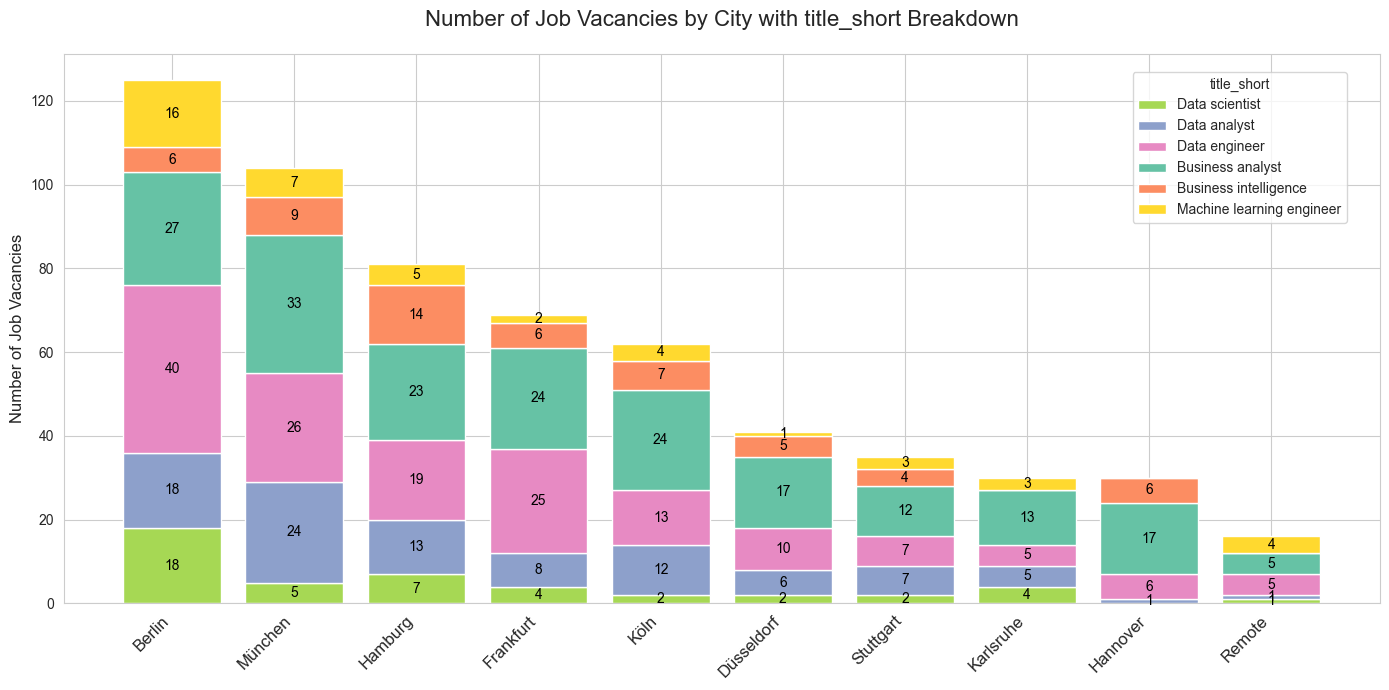

In [81]:
# Build a pivot table:
# For each city (where the corresponding column value is 1),
# count how many times each value appears in title_short.
data = {}
for city in cities:
    counts = df_cities.loc[df_cities[city] == 1, 'title_short'].value_counts()
    data[city] = counts

# Convert the dictionary to a DataFrame
city_breakdown = pd.DataFrame(data).fillna(0).astype(int)

# Transpose so that rows represent cities and columns represent title_short categories
city_breakdown = city_breakdown.transpose()

# (Optional) Sort cities by the total number of job vacancies
city_breakdown['Total'] = city_breakdown.sum(axis=1)
city_breakdown = city_breakdown.sort_values(by='Total', ascending=False)
city_breakdown = city_breakdown.drop(columns='Total')

# Define the desired order of categories for the lower segments of each bar
desired_order = ["Data scientist", "Data analyst", "Data engineer"]
# If the column names may differ in case, compare in lower case:
present_desired = [cat for cat in desired_order if cat in city_breakdown.columns]
# Other categories:
other_categories = [cat for cat in city_breakdown.columns if cat not in present_desired]
# Final order: desired categories first (to appear at the bottom), then the rest:
final_order = present_desired + other_categories

# Create a color palette for all categories
palette = sns.color_palette("Set2", n_colors=len(city_breakdown.columns))
color_map = dict(zip(city_breakdown.columns, palette))

# Build the stacked bar chart
plt.figure(figsize=(14, 7))
bottom = np.zeros(len(city_breakdown))
cities_sorted = city_breakdown.index.tolist()

for category in final_order:
    counts = city_breakdown[category].values
    plt.bar(cities_sorted, counts, bottom=bottom, color=color_map[category], label=category)
    bottom += counts

# (Optional) Add text labels to the segments
for i, city in enumerate(cities_sorted):
    y_offset = 0
    for category in final_order:
        count = city_breakdown.loc[city, category]
        if count > 0:
            plt.text(i, y_offset + count/2, str(count), ha='center', va='center', fontsize=10, color='black')
        y_offset += count

# Chart settings
plt.title("Number of Job Vacancies by City with title_short Breakdown", fontsize=16, pad=20)
plt.xlabel("")
plt.ylabel("Number of Job Vacancies", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)

# Place the legend inside the plot area at the upper right.
plt.legend(title="title_short", loc="upper right", bbox_to_anchor=(0.98, 0.98))
plt.tight_layout()
plt.show()

In [82]:
df_cities = df_cities.dropna(subset=["salary_min", "salary_max"])
df_cities

,id,title,company,city,salary_min,salary_max,days_posted,title_short,seniority,Berlin,München,Hamburg,Köln,Frankfurt,Stuttgart,Düsseldorf,Karlsruhe,Hannover,Remote
0,12463614,Data Analyst Sales (m/w/d),BusinessBike GmbH,Herzogenaurach,49000.0,68000.0,<NA>,Data analyst,None(Mid),0,0,0,0,0,0,0,0,0,0
1,12433847,Operations Analyst / Business Analyst – Planni...,DOT GmbH,Rostock,39000.0,62000.0,<NA>,Business analyst,None(Mid),0,0,0,0,0,0,0,0,0,0
2,12442527,Aktuar / Mathematiker / Data Analyst (m/w/d) f...,RheinLand Versicherungs AG,Neuss,65000.0,95000.0,4,Data analyst,None(Mid),0,0,0,0,0,0,0,0,0,0
3,12447989,Data Analyst - Integration von Datenbanken (m/...,EOS Holding,Hamburg,53000.0,73000.0,4,Data analyst,None(Mid),0,0,1,0,0,0,0,0,0,0
4,12449934,Referent / Data Analyst technisches Reinsuranc...,Allianz Versicherungs-AG,Unterföhring bei München,53000.0,91000.0,4,Data analyst,Senior,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7517,12400768,Fachinformatiker für Daten- und Prozessanalyse...,proMX AG,"Nürnberg, Deutschland",32000.0,47000.0,<NA>,Data analyst,None(Mid),0,0,0,0,0,0,0,0,0,0
7715,12420779,Dezernatsleitung (m/w/d) „Datenbankverfahren“,Landesamt für Vermessung und Geoinformation S-H,Kiel,52000.0,71000.0,7,Data engineer,None(Mid),0,0,0,0,0,0,0,0,0,0
7726,11795544,Datenbankadministrator (w/m/d),DYNASYS Datentechnik GmbH,Augsburg,37000.0,53000.0,7,Data engineer,None(Mid),0,0,0,0,0,0,0,0,0,0
7908,12125513,Consultant (w/m/d) Business Intelligence,"MCG, Management Consulting GmbH",Mannheim,45000.0,62000.0,7,Business intelligence,None(Mid),0,0,0,0,0,0,0,0,0,0


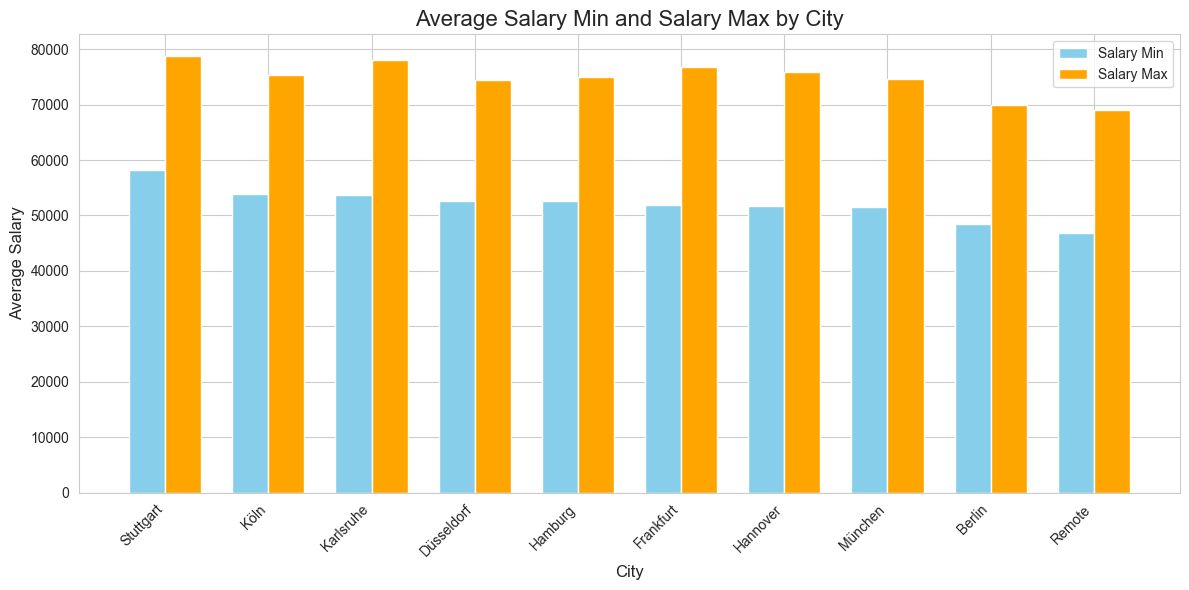

In [83]:
# Calculate the average salary_min and salary_max for each city.
city_salary = []
for city in cities:
    # Select only the rows where the city indicator equals 1.
    subset = df_cities[df_cities[city] == 1]
    avg_min = subset['salary_min'].mean()
    avg_max = subset['salary_max'].mean()
    city_salary.append({
        'City': city,
        'Average Salary Min': avg_min,
        'Average Salary Max': avg_max
    })

# Convert the results into a DataFrame.
salary_df = pd.DataFrame(city_salary)

# (Optional) Sort the DataFrame by the average minimum salary.
salary_df = salary_df.sort_values(by='Average Salary Min', ascending=False)

# Create a side-by-side bar chart.
x = np.arange(len(salary_df))
width = 0.35  # width of each bar

plt.figure(figsize=(12, 6))
bar_min = plt.bar(x - width/2, salary_df['Average Salary Min'], width,
                  label='Salary Min', color='skyblue')
bar_max = plt.bar(x + width/2, salary_df['Average Salary Max'], width,
                  label='Salary Max', color='orange')

plt.xlabel('City', fontsize=12)
plt.ylabel('Average Salary', fontsize=12)
plt.title('Average Salary Min and Salary Max by City', fontsize=16)
plt.xticks(x, salary_df['City'], rotation=45, ha='right')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


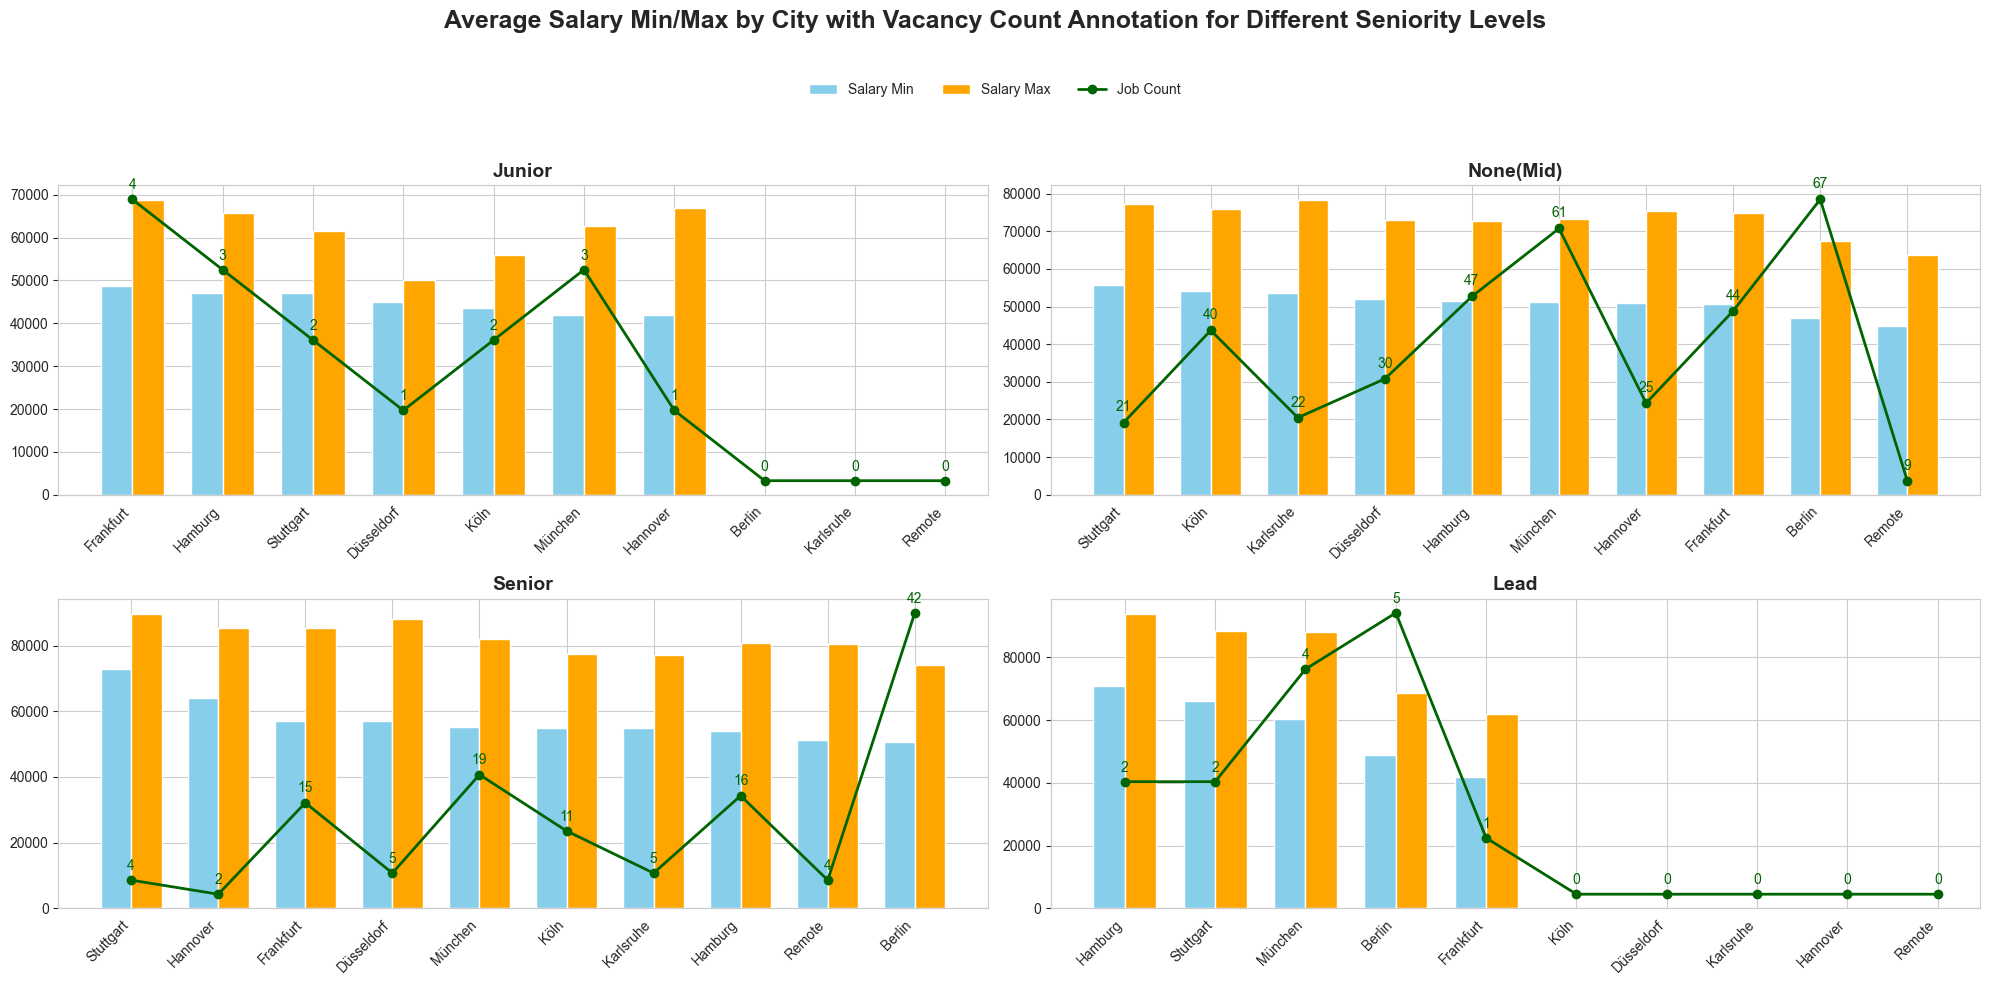

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# For example, make sure you have defined `cities` and `df_cities` prior in your code.
# cities = ['Berlin', 'München', 'Hamburg', 'Köln', 'Frankfurt', 
#           'Stuttgart', 'Düsseldorf', 'Karlsruhe', 'Hannover', 'Remote']

# Seniority levels to plot
seniority_values = ["Junior", "None(Mid)", "Senior", "Lead"]

# Create a figure with 4 subplots (2 rows x 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
fig.suptitle("Average Salary Min/Max by City with Vacancy Count Annotation for Different Seniority Levels",
             fontsize=18, fontweight="bold")

# Initialize variables to capture legend handles for bars and job count line
job_count_line_handle = None
handles_bars, labels_bars = None, None

for i, (seniority, ax) in enumerate(zip(seniority_values, axes.flatten())):
    # Filter dataset for the current seniority level
    df_filtered = df_cities[df_cities["seniority"] == seniority]
    
    # Compute average salaries and job count by city for the current seniority level
    city_salary = []
    for city in cities:
        subset = df_filtered[df_filtered[city] == 1]
        avg_min = subset['salary_min'].mean()
        avg_max = subset['salary_max'].mean()
        job_count = len(subset)
        city_salary.append({
            'City': city,
            'Average Salary Min': avg_min,
            'Average Salary Max': avg_max,
            'Job Count': job_count
        })
    
    # Create a DataFrame and (optionally) sort by average salary_min
    salary_df = pd.DataFrame(city_salary)
    salary_df = salary_df.sort_values(by='Average Salary Min', ascending=False)
    
    # Prepare positions for the x-axis and set bar width
    x = np.arange(len(salary_df))
    width = 0.35

    # Plot side-by-side bars for average salary_min and average salary_max
    ax.bar(x - width/2, salary_df['Average Salary Min'], width,
           label="Salary Min", color='skyblue')
    ax.bar(x + width/2, salary_df['Average Salary Max'], width,
           label="Salary Max", color='orange')
    
    # Set titles and labels in the main axis
    ax.set_title(f"{seniority}", fontsize=14, fontweight="bold")
    ax.set_xticks(x)
    ax.set_xticklabels(salary_df["City"], rotation=45, ha="right")
    
    # Create a twin axis for plotting the job count as a line with markers
    ax2 = ax.twinx()
    line, = ax2.plot(x, salary_df['Job Count'], marker='o', color='darkgreen', linewidth=2)
    
    # Capture the handle for the job count line only once
    if job_count_line_handle is None:
        job_count_line_handle = line
    
    # Hide the count axis: no tick marks, no label, and hide the right spine
    ax2.set_yticks([])
    ax2.set_ylabel("")
    ax2.spines['right'].set_visible(False)
    
    # Add text above each marker with the exact job count using a fixed offset relative to the maximum in this subplot
    offset = 0.025 * (salary_df['Job Count'].max())
    for j, count in enumerate(salary_df['Job Count']):
        ax2.text(x[j], count + offset, str(count), color='darkgreen', fontsize=10,
                 ha='center', va='bottom')
    
    # For the first subplot, capture the legend handles for the bars
    if i == 0:
        handles_bars, labels_bars = ax.get_legend_handles_labels()

# Combine the legend handles: bar handles plus the job count line handle, and create a global legend.
global_handles = handles_bars + [job_count_line_handle]
global_labels = labels_bars + ["Job Count"]
fig.legend(global_handles, global_labels, loc="upper center", bbox_to_anchor=(0.5, 0.92),
           ncol=len(global_labels), frameon=False)

plt.tight_layout(rect=[0, 0, 1, 0.88])
plt.show()


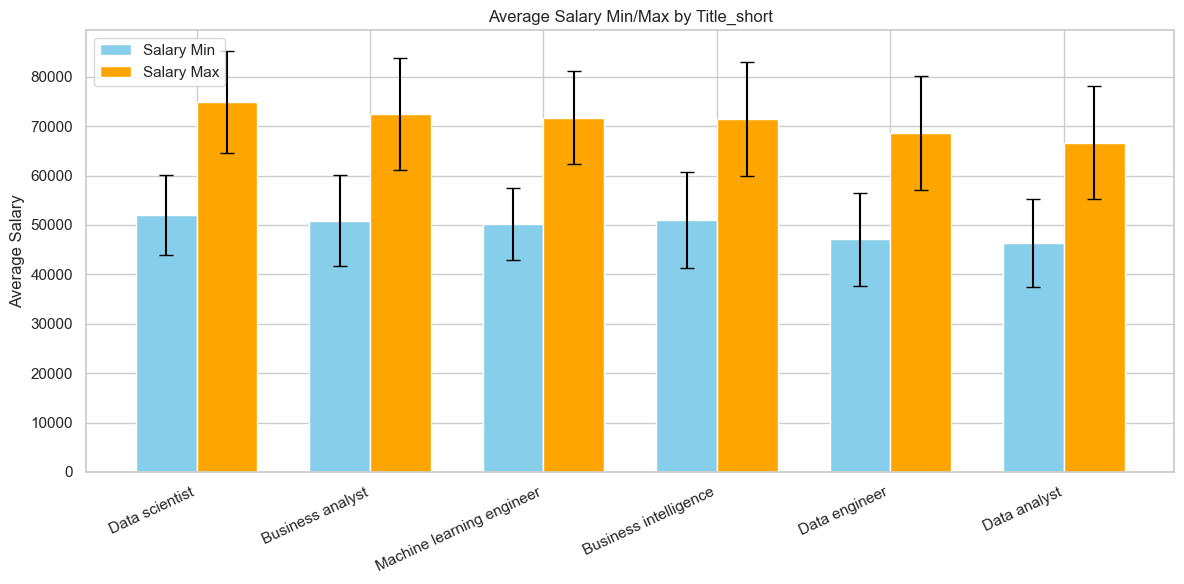

In [295]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Group the DataFrame by title_short and calculate the average salaries.
df_grouped = df_cities.groupby('title_short')[['salary_min', 'salary_max']].mean().reset_index()

# Also compute the standard deviations.
df_std = df_cities.groupby('title_short')[['salary_min', 'salary_max']].std().reset_index()

# (Optional) Sort the groups by salary_max (or salary_min) so that the x-order is meaningful.
df_grouped = df_grouped.sort_values(by='salary_max', ascending=False)

# Rearrange df_std so that it is ordered the same way as df_grouped.
df_std = df_std.set_index('title_short').loc[df_grouped['title_short']].reset_index()

# Create positions for the x-axis.
x = np.arange(len(df_grouped))
width = 0.35  # Width of each bar.

# Create the grouped bar chart with error bars for standard deviation.
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(
    x - width/2, 
    df_grouped['salary_min'], 
    width,
    label='Salary Min', 
    color='skyblue', 
    yerr=df_std['salary_min'], 
    capsize=5, 
    error_kw=dict(ecolor='black')
)
ax.bar(
    x + width/2, 
    df_grouped['salary_max'], 
    width,
    label='Salary Max', 
    color='orange', 
    yerr=df_std['salary_max'], 
    capsize=5, 
    error_kw=dict(ecolor='black')
)

# Set the x-axis tick locations and labels.
ax.set_xticks(x)
ax.set_xticklabels(df_grouped['title_short'], rotation=25, ha='right')

ax.set_ylabel('Average Salary')
ax.set_title('Average Salary Min/Max by Title_short')
ax.legend()

plt.tight_layout()
plt.show()


In [288]:
#df.to_csv("all_vacancies_de_05_2025.csv", index=False)